<a href="https://colab.research.google.com/github/AdityaKendre02/BreastMNIST-Classification-using-CNN/blob/main/Aditya_Kendre_DH302_Assignment_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to Measure time taken by program to execute.
import time
  
# store starting time
begin = time.time()

# Q1) Select any one of the above given datasets which are part of MedMNIST

Dataset Chosen : Breast MNIST

In [2]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=499081137a17857fe78eefb8ba5768bfd444e1d371c5a38ac3b92c22a0ab6c8c
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


# Q2) Briefly explain the dataset in your notebook (based on image modality, classes in dataset and their significance) 

Breast MNIST Dataset

 

*   The data collected includes breast ultrasound images among women in ages between 25 and 75 years old. 

*    This data was collected in 2018 and the number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500 × 500 pixels. The images are in grayscale PNG format.

*   The images are categorized into three classes, which are normal, benign, and malignant.
*   Significance : As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative.



   


# Q3) Download the dataset and load it as dataloaders for training and testing model 

In [3]:
from tqdm import tqdm # to make progress bars
import numpy as np # Numpy is imported to perform array operations and also for Linear Algebra.
import torch # Pytorch and related modules are imported for implementing neural networks and related tasks
import torch.nn as nn # Pytorch and related modules are imported for implementing neural networks and related tasks
import torch.optim as optim # Pytorch and related modules are imported for implementing neural networks and related tasks
import torch.utils.data as data # Pytorch and related modules are imported for implementing neural networks and related tasks
import torchvision.transforms as transforms # Pytorch and related modules are imported for implementing neural networks and related tasks
from matplotlib import pyplot as plt #Matplotlib is imported for data visualisation, plotting graphs, etc.

import medmnist
from medmnist import INFO, Evaluator

In [4]:
data_flag = "breastmnist"
download = True
data_flag = data_flag.lower()

# Tune hyperparameters for training model like epochs, batch size and learning rate
NUM_EPOCHS = 15 #the number of passes of the entire training dataset the machine learning algorithm has completed.
BATCH_SIZE = 128 #the number of training examples utilized in one iteration
lr = 0.003 #a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

info = INFO[data_flag]
task = info['task']

DataClass = getattr(medmnist, info['python_class'])

In [5]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(), #Converts the data to Tensor so that we can perform further operations
    transforms.Normalize(mean=[.5], std=[.5]) #normalises the data so that it is regularised
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download) #data is split into train and test
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

  0%|          | 0/559580 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


#Q4) Print number of classes in dataset 

In [6]:
train_dataset.labels

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
#Or we could do this as well instead of train_dataset.labels. But since this is a tedious way to do it I used above method.
#arr = [0]
#for i in range (545):
#  arr.append(train_dataset[i][1])
#arr

In [8]:
a=train_dataset.labels
np.unique(a) 

array([0, 1], dtype=uint8)

In [9]:
len(np.unique(a))# So we can conclude that there are 2 classes in the dataset

2

In [10]:
print("Therefore, Number of Classes in dataset is "+ str(len(np.unique(a))))

Therefore, Number of Classes in dataset is 2


I have written the below code to prove that there are 2 classes as we found above

In [11]:
train_dataset.info["label"]

{'0': 'malignant', '1': 'normal, benign'}

In [12]:
train_dataset.info

{'python_class': 'BreastMNIST',
 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.',
 'url': 'https://zenodo.org/record/6496656/files/breastmnist.npz?download=1',
 'MD5': '750601b1f35ba3300ea97c75c52ff8f6',
 'task': 'binary-class',
 'label': {'0': 'malignant', '1': 'normal, benign'},
 'n_channels': 1,
 'n_samples': {'train': 546, 'val': 78, 'test': 156},
 'license': 'CC BY 4.0'}

# Q5) Print number of channels in image

In [13]:
train_dataset[0][0].shape[0] #number of channels means the number of layers eg: for grayscale it is 1 and for RGB it is 3

1

In [14]:
print("Therefore, Number of channels in image is "+ str(train_dataset[0][0].shape[0]))

Therefore, Number of channels in image is 1


# Q6) Display atleast 1 image from each class

Following is image from class 1


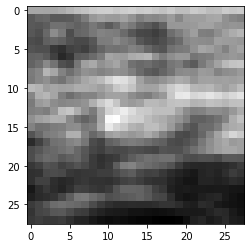

In [15]:
print(f'Following is image from class {train_dataset[0][1][0]}') # Since I had seen in the labels that image with index 0 had label 0, so I used train_dataset[0][1][0].

plt.imshow(train_dataset[0][0].reshape((28, 28)), cmap='gray')
plt.show()

Following is image from class 1


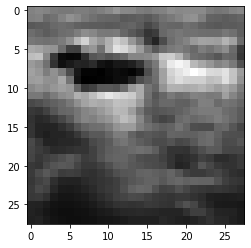

In [16]:
print(f'Following is image from class {train_dataset[1][1][0]}') # Since I had seen in the labels that image with index 1 had label 1, so I used train_dataset[1][1][0].

plt.imshow(train_dataset[1][0].reshape((28, 28)), cmap='gray')
plt.show()

Following is image from class 0


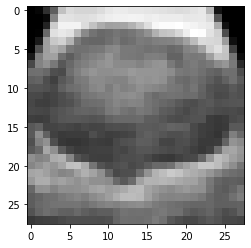

In [17]:
print(f'Following is image from class {train_dataset[4][1][0]}') # Since I had seen in the labels, image with index 4 had label 0.

plt.imshow(train_dataset[4][0].reshape((28, 28)), cmap='gray')
plt.show()

Following is image from class 0


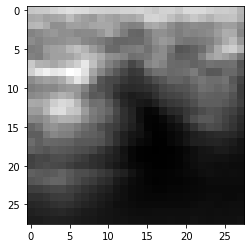

In [18]:
print(f'Following is image from class {train_dataset[12][1][0]}') # Since I had seen in the labels, image with index 12 had label 0.

plt.imshow(train_dataset[12][0].reshape((28, 28)), cmap='gray')
plt.show()

In [19]:
#for i in range (545):
#  print(f'Following is image from class {train_dataset[i][1][0]}') 
#
#  plt.imshow(train_dataset[i][0].reshape((28, 28)), cmap='gray')
#  plt.show()
# I ran this code just for curiosity to see how all the normal and malignant tumours are!

# Q7) Print number of images in each class in selected dataset

In [20]:
len(a) # len(a) will give total number of images

546

In [21]:
np.sum(a) # np.sum(a) will give the number of images labelled '1'

399

In [22]:
len(a)-np.sum(a) # len(a)-np.sum(a) will give the number of images labelled '0'

147.0

In [23]:
print("Therefore, number of images in class '0' is "+ str(int(len(a)-np.sum(a))) + " and number of images in class '1' is " + str(np.sum(a)))

Therefore, number of images in class '0' is 147 and number of images in class '1' is 399


# Q8) Is the dataset balanced ? Comment on what might be possible reasons for imbalance in dataset ? 

No, the dataset is not balanced as we get a 'normal' to 'malignant' ratio of approx 2.71 : 1. 

The possible reasons for imbalance in the dataset is as follows:


1) Generally, ratio of healthy people to diseased people is always imbalanced


2) Not all the tumours are malignant. Very few develop into Malignant


# Q9) Use any CNN model (e.g. ResNet, etc) which can be used for classification and train it on selected dataset. 

In [24]:
n_classes=2

In [25]:
n_channels=1

In [26]:
# define a simple CNN model

class Net(nn.Module): 
    def __init__(self, in_channels, num_classes): # A constructor is defined. A constructor gets executed always whenever the function is called.
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(                                                     # nn.Sequential creates a new layer of Neural Networks
            nn.Conv2d(in_channels, 16, kernel_size=3),                                   # In PyTorch, we can create a convolutional layer using nn.Conv2d.
            nn.BatchNorm2d(16), #normalizes the activations of the network between       # in_channels => number of channels in the input (lower layer)
       #layers in batches so that the batches have a mean of 0 and a variance of 1       # out_channels => number of channels in the output (next layer)
            nn.ReLU()) #The activation function used is Rectified Linear Unit(ReLU)      # kernel_size => size of the kernel field
                                                                                          

        self.layer2 = nn.Sequential(                # nn.Sequential creates a new layer of Neural Networks
            nn.Conv2d(16, 16, kernel_size=3),       # In PyTorch, we can create a convolutional layer using nn.Conv2d.
            nn.BatchNorm2d(16),                     # in_channels => number of channels in the input (lower layer)
            nn.ReLU(),                              # out_channels => number of channels in the output (next layer)
            nn.MaxPool2d(kernel_size=2, stride=2))  # kernel_size => size of the kernel field
            #Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.
            #Stride is the number of pixels shifts over the input matrix.

        self.layer3 = nn.Sequential(                # nn.Sequential creates a layer of Neural Networks
            nn.Conv2d(16, 64, kernel_size=3),       # In PyTorch, we can create a convolutional layer using nn.Conv2d.
            nn.BatchNorm2d(64),                     # normalizes the activations of the network
            nn.ReLU())                              # The activation function used is Rectified Linear Unit(ReLU)
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),       # We add multiple layers as each layer identifies a particular feature. Generally, we are not aware
            nn.BatchNorm2d(64),                     # how it works exactly but initially edge detection takes place and then more finer details are detected
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1), # same explanations as given above
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),       #nn.Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output
            nn.ReLU(),                        # same explanations as given above
            nn.Linear(128, 128),              #We need a final Linear Layer since we want to assign a class label
            nn.ReLU(),
            nn.Linear(128, num_classes))
        
#Here we define the structure of the neural network. This implementation overrides the implementation of "forward" in the parent class nn.Module
    def forward(self, x):
        x = self.layer1(x) # We are adding layers 
        x = self.layer2(x) # step by step
        x = self.layer3(x) # so it acts as a deep neural network
        x = self.layer4(x) # as of now it is a very basic architecture
        x = self.layer5(x) # but we can create more efficent and sophisticated architectures
        x = x.view(x.size(0), -1) # This line of code flattens the tensor because the Linear layer only accepts a vector (1d array)
        x = self.fc(x) # It is a fully connected layer. 
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)
    
# define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [27]:
# train

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    
    model.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)
        
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
          
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
        
        loss.backward() # calculate gradients = backward pass (for back propagation).
                        # please note that gradient computation cn happen only after the loss is specified.
        optimizer.step()
 # We can find accuracy by the below method also but finally I have implemented the code written in the Inf-AI-Health-ML3-BloodMNIST.ipynb   
 #       pred = outputs.data.max(1, keepdim=True)[1] # The following lines of code are written to find the train accuracy.
 #       train_correct += pred.eq(targets.data.view_as(pred)).sum()
 #       train_total+=len(inputs)
 #   train_accuracy = train_correct/train_total
 #   print(train_accuracy)

100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


In [28]:
#for inputs, targets in tqdm(test_loader):
#        outputs = model(inputs)
#        pred = outputs.data.max(1, keepdim=True)[1]           # The following lines of code are written to find the train accuracy.
#        test_correct += pred.eq(targets.data.view_as(pred)).sum()
#        test_total+=len(inputs)
#test_accuracy = test_correct/test_total
#print(test_accuracy)

In [29]:
# evaluation

def test(split):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad(): #No gradient computation since we only want to do forward propagation
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1) #Softmax for classification. 
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy() # convert tensor to numpy
        y_score = y_score.detach().numpy() 
        
        evaluator = Evaluator(data_flag, split) #pre defined library to evaluate metrics is used
        metrics = evaluator.evaluate(y_score) 
    
        #auc or The area under a curve between two points is found out by doing a definite integral between the two points. 
        #To find the area under the curve y = f(x) between x = a & x = b, integrate y = f(x) between the limits of a and b. 
        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

        
print('==> Evaluating ...')
test('train')
test('test')

==> Evaluating ...
train  auc: 0.907  acc:0.842
test  auc: 0.831  acc:0.782


# Comment on train and test accuracy of the model


We can see that the train accuracy is 0.842 and the test accuracy is 0.782. I think it is good as it trains well on training data and also gives good accuracy in the test data. And since we used very basic CNN Architecture so it is good with respect to this aspect!
(If you run the code again these values will change!)

# Try to find out per class test accuracy for model (Bonus Question)

In [30]:
class1_correct=0
class2_correct=0
class1_total=0
class2_total=0
for inputs, targets in tqdm(test_loader):
        outputs = model(inputs)
        pred = outputs.data.max(1, keepdim=True)[1]
        correct = pred.eq(targets.data.view_as(pred))
        for i in range(len(targets)):
          if(targets[i]==0):
            class1_total+=1
            class1_correct+=correct[i]

          else:
            class2_total+=1
            class2_correct+=correct[i]
class1_accuracy = class1_correct/class1_total
class2_accuracy = class2_correct/class2_total
print(class1_accuracy, class2_accuracy)

100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

tensor([0.3333]) tensor([0.9474])


The per class test accuracy is as follows:


1) For Malignant (Label '0') : 0.3333


2) For Normal (Label '1') : 0.9474

(If you run the code again these values will change!)

In [31]:
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin} seconds")

Total runtime of the program is 54.44748330116272 seconds
